In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as back

2024-04-22 15:31:10.049412: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 15:31:10.050079: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 15:31:10.053580: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 15:31:10.096629: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 15:31:10.869926: W tensorflow/compiler/tf2tensorrt/utils/py_uti

First, the cleaned data is read in from the csv.

In [3]:
ang = pd.read_csv('full_data.csv', usecols=['Ang_Pos'])
gaze = pd.read_csv('full_data.csv', usecols=['Gaze.x.', 'Gaze.y.'])

Then, the data is randomly split into train/test portions, normalized, and converted to a format that can be input to keras.

In [18]:
ang_train, ang_test, gaze_train, gaze_test = train_test_split(ang, gaze, test_size=0.33)

ang_train = (ang_train + 360) / 360
ang_test = (ang_test + 360) / 360

ang_train = ang_train.astype(np.float32).to_numpy()
ang_test = ang_test.astype(np.float32).to_numpy()

gaze_train['Gaze.x.'] = gaze_train['Gaze.x.'] / 2560
gaze_train['Gaze.y.'] = gaze_train['Gaze.y.'] / 1080

gaze_test['Gaze.x.'] = gaze_test['Gaze.x.'] / 2560
gaze_test['Gaze.y.'] = gaze_test['Gaze.y.'] / 1080

gaze_train = gaze_train.astype(np.float32).to_numpy()
gaze_test = gaze_test.astype(np.float32).to_numpy()

In [99]:
ang_train.min(), ang_train.max()

(0.38541603, 1.5667822)

In [15]:
gaze_test

array([[0.20105118, 0.42415518],
       [0.6019383 , 0.42015362],
       [0.55646795, 0.43415287],
       ...,
       [0.5265566 , 0.36817566],
       [0.7167371 , 0.43375805],
       [0.5009469 , 0.40607992]], dtype=float32)

The model has four fully connected RELU layers, which was able to achieve reasonable accuracy without running extremely slowly. The output layer also RELU, since sigmoid only returns values (0, 1) and softmax isn't applicable to 1-dim arrays.

Adam is a widely useful optimizer and mean_absolute_percentage_error was the most effective with our non-categorical data.

In [8]:
model = keras.Sequential([
    keras.layers.Input((2,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    
    keras.layers.Dense(1, activation='relu')
])

# Compile 
model.compile(optimizer='adam', loss='mean_absolute_percentage_error', metrics=[keras.metrics.MeanAbsolutePercentageError()])

# Train
h = model.fit(gaze_train, ang_train, epochs=50, validation_split=0.1)


Epoch 1/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 761us/step - loss: 32.6800 - mean_absolute_percentage_error: 32.6800 - val_loss: 22.4103 - val_mean_absolute_percentage_error: 22.4000
Epoch 2/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 729us/step - loss: 21.9678 - mean_absolute_percentage_error: 21.9678 - val_loss: 21.3960 - val_mean_absolute_percentage_error: 21.3893
Epoch 3/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 728us/step - loss: 21.7233 - mean_absolute_percentage_error: 21.7233 - val_loss: 21.4563 - val_mean_absolute_percentage_error: 21.4506
Epoch 4/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 723us/step - loss: 21.5256 - mean_absolute_percentage_error: 21.5256 - val_loss: 22.0803 - val_mean_absolute_percentage_error: 22.0785
Epoch 5/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 719us/step - loss: 21.4849 - mean_absolute_percentage_error: 21.4849 - val_loss: 21.2493 - val_mean_absolute_percentage_error: 21.2442
Epoch 6/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 727us/step - loss: 21.4100 - mean_absolute_percentage_e

4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 697us/step - loss: 20.5164 - mean_absolute_percentage_error: 20.5164 - val_loss: 20.2931 - val_mean_absolute_percentage_error: 20.2882
Epoch 40/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 695us/step - loss: 20.4634 - mean_absolute_percentage_error: 20.4634 - val_loss: 20.0093 - val_mean_absolute_percentage_error: 20.0043
Epoch 41/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 703us/step - loss: 20.4623 - mean_absolute_percentage_error: 20.4623 - val_loss: 20.3156 - val_mean_absolute_percentage_error: 20.3111
Epoch 42/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 706us/step - loss: 20.4351 - mean_absolute_percentage_error: 20.4351 - val_loss: 20.1001 - val_mean_absolute_percentage_error: 20.0971
Epoch 43/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 694us/step - loss: 20.5405 - mean_absolute_percentage_error: 20.5405 - val_loss: 19.9946 - val_mean_absolute_percentage_error: 19.9906
Epoch 44/50
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 3s 709us/step - loss: 20.4667 - mean_absolute_percentage_error: 

The model starts at a surprisingly low error rate, leaving not much room for growth without overfitting. However, we trained the model to ~80% accuracy.

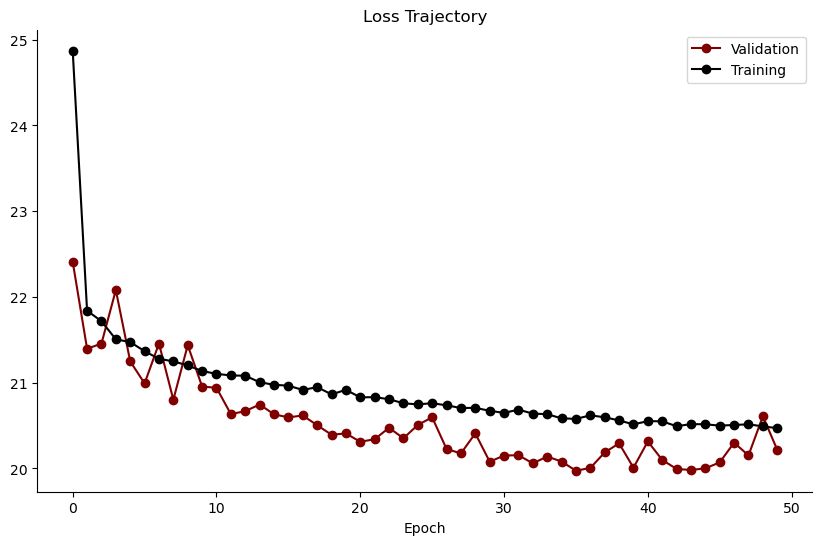

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(range(50), h.history['val_loss'], 'o-', color='maroon', label='Validation')
ax.plot(range(50), h.history['loss'], 'o-', color='black', label='Training')
ax.set_xlabel('Epoch')
#ax.set_ylabel('Huber loss')
ax.legend()
ax.set_title('Loss Trajectory')
sns.despine(ax=ax)

In [19]:
test_loss, test_accuracy = model.evaluate(gaze_test, ang_test)

2240/2240 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - loss: 20.2665 - mean_absolute_percentage_error: 20.2665


In [20]:
test_loss, test_accuracy

(20.28689193725586, 20.290790557861328)

In the interest of using this data to inform our likelihood, sample predictions were used to generate a distribution of possible "headings" (relative angular positions).

In [28]:
pred = model.predict(gaze_test)
pred = (pred * 360) - 360

2240/2240 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step


In [32]:
pred

array([[  22.319061],
       [ -99.868805],
       [ -95.65497 ],
       ...,
       [-121.20567 ],
       [   8.763611],
       [  30.692932]], dtype=float32)

array([[  22.319061],
       [ -99.868805],
       [ -95.65497 ],
       ...,
       [-121.20567 ],
       [   8.763611],
       [  30.692932]], dtype=float32)

We also attempted to train the model to predict heading based on gaze, but this was not effective.

In [134]:
# Basic feedforward structure
model2 = keras.Sequential([
    keras.layers.Input((1,)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    
    keras.layers.Dense(2, activation='softmax')
])

# Compile 
model2.compile(optimizer='adam', loss='huber', metrics=[keras.metrics.MeanAbsolutePercentageError()])

# Train
j = model2.fit(ang_train, gaze_train, epochs=20, validation_split=0.1)


Epoch 1/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 159.3608 - mean_absolute_percentage_error: 159.3608 - val_loss: 115.9348 - val_mean_absolute_percentage_error: 115.9449
Epoch 2/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 122.6788 - mean_absolute_percentage_error: 122.6788 - val_loss: 154.9944 - val_mean_absolute_percentage_error: 155.0453
Epoch 3/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 132.1546 - mean_absolute_percentage_error: 132.1546 - val_loss: 106.0368 - val_mean_absolute_percentage_error: 106.0792
Epoch 4/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 113.8732 - mean_absolute_percentage_error: 113.8732 - val_loss: 76.9916 - val_mean_absolute_percentage_error: 77.0170
Epoch 5/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 115.9394 - mean_absolute_percentage_error: 115.9394 - val_loss: 63.5529 - val_mean_absolute_percentage_error: 63.5866
Epoch 6/20
4092/4092 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 113.2560 - mean_absolute_percent

NameError: name 'j' is not defined

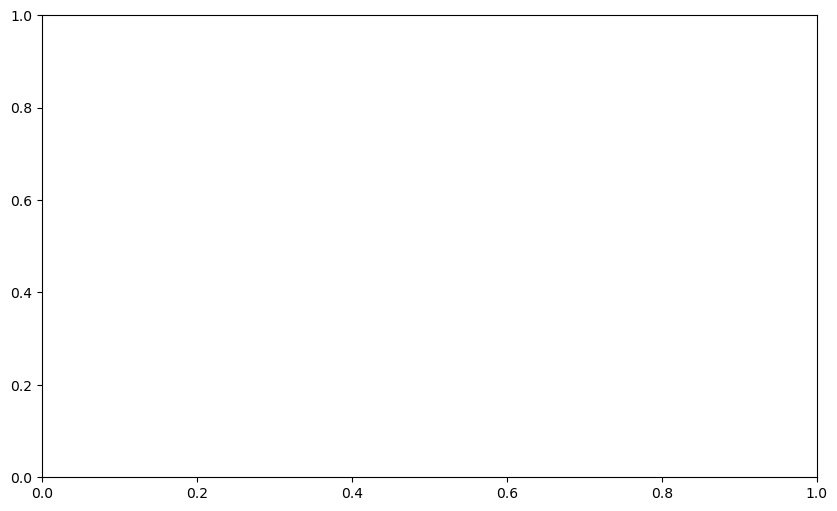

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(range(50), j.history['val_loss'], 'o-', color='maroon', label='Validation')
ax.plot(range(50), j.history['loss'], 'o-', color='black', label='Training')
ax.set_xlabel('Epoch')
ax.set_ylabel('Percentage error')
ax.legend()
ax.set_title('Loss Trajectory')
sns.despine(ax=ax)

In [136]:
test_loss, test_accuracy = model2.evaluate(ang_test, gaze_test)

2240/2240 ━━━━━━━━━━━━━━━━━━━━ 2s 688us/step - loss: 82.0181 - mean_absolute_percentage_error: 82.0181


In [137]:
test_loss, test_accuracy

(75.42182922363281, 75.44270324707031)